In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('001.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [6]:
df['Virus Present'].value_counts()

Virus Present
0    200
1    200
Name: count, dtype: int64

<Axes: xlabel='Virus Present', ylabel='count'>

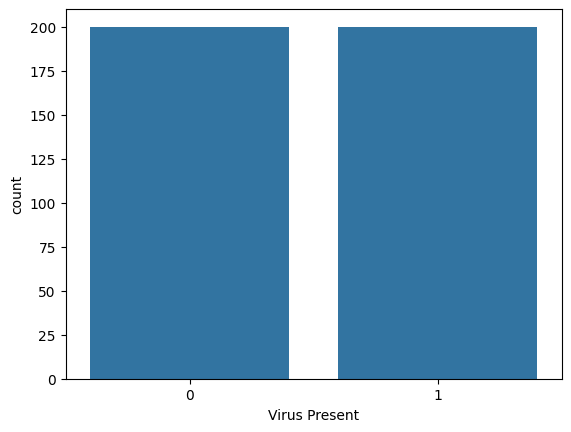

In [7]:
sns.countplot(data=df ,x='Virus Present')

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

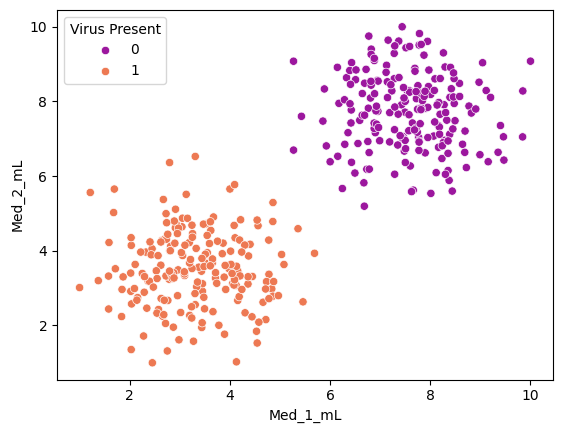

In [9]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df,palette='plasma')


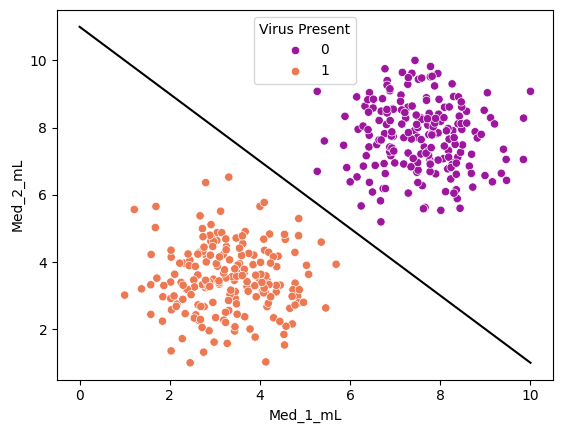

In [10]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='plasma',data=df)
x=np.linspace(0,10,100)
m=-1
b=11
y=m*x+b
plt.plot(x,y,'k')

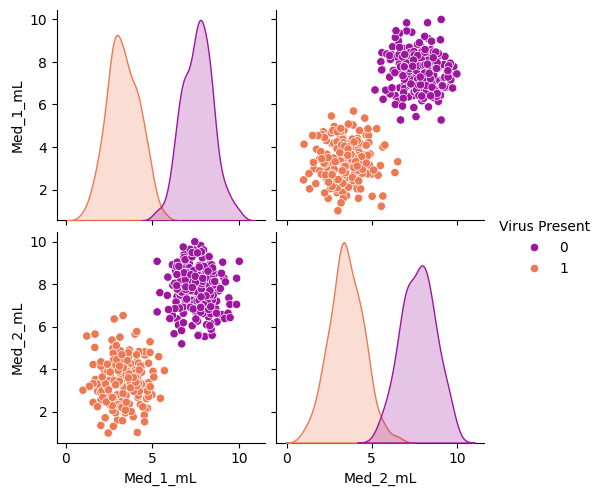

In [12]:
sns.pairplot(data=df,hue='Virus Present',palette='plasma')

In [11]:
def plot_svm_boundary(model, X, y):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap='RdBu')
    ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.c_[XX.ravel(), YY.ravel()]
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    
    plt.show()

In [16]:
y=df['Virus Present']
X=df.drop('Virus Present',axis=1)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

c:\Users\OMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


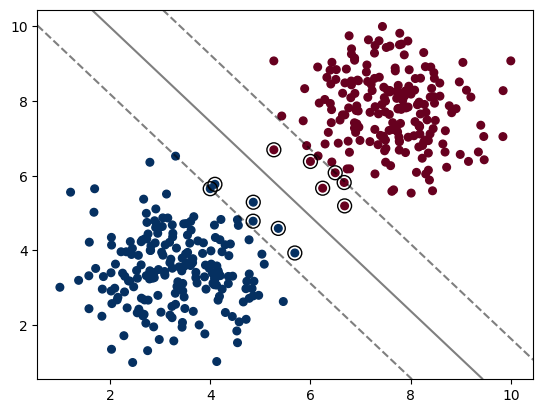

In [30]:
model=SVC(kernel='linear',C=0.100)
model.fit(X,y)
plot_svm_boundary(model, X, y)


c:\Users\OMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


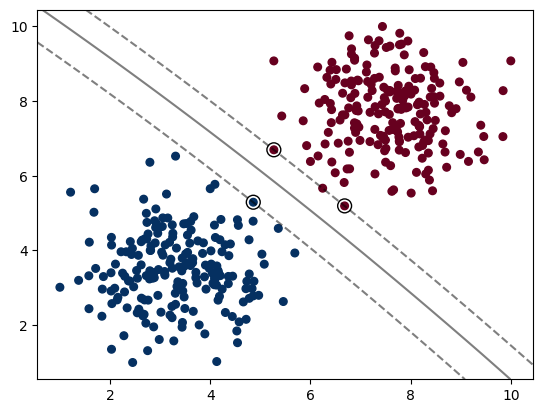

In [26]:
model=SVC(kernel='poly',C=10)
model.fit(X,y)
plot_svm_boundary(model, X, y)


c:\Users\OMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


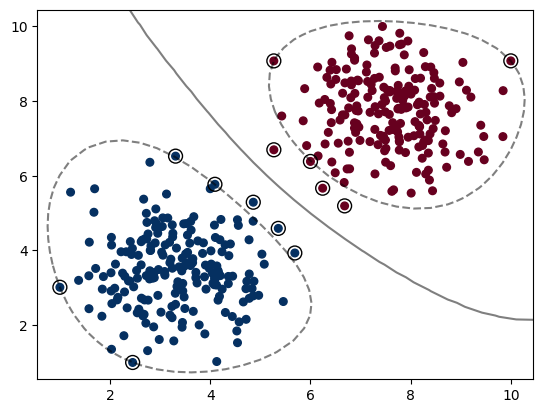

In [27]:
model=SVC(kernel='rbf',C=1)
model.fit(X,y)
plot_svm_boundary(model, X, y)

c:\Users\OMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


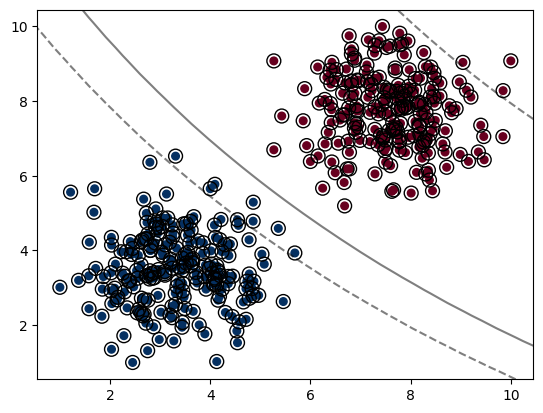

In [31]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

c:\Users\OMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


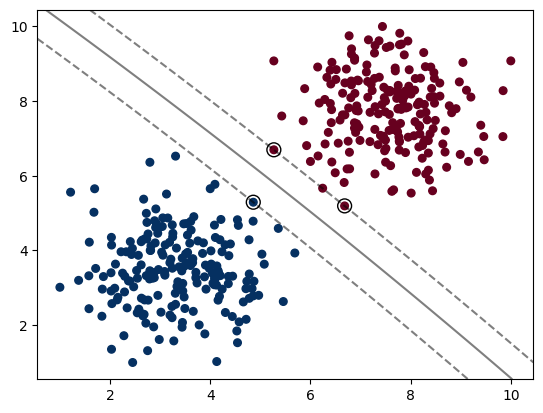

In [32]:
model = SVC(kernel='poly', C=1,degree=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [34]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','poly'],'degree' : [1,2,5,10]}
grid = GridSearchCV(svm,param_grid)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'degree': [1, 2, 5, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [35]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'kernel': 'linear'}

In [36]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=.3, random_state=42)

In [39]:
y_predict = model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,ConfusionMatrixDisplay

In [41]:
accuracy_score(y_predict,y_test)

1.0

In [42]:
f1_score(y_predict,y_test)

1.0

In [43]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



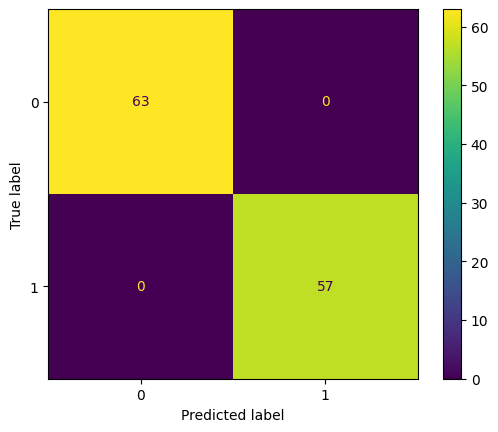

In [44]:
cm = confusion_matrix(y_test, y_predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()